In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os

## EigenCats

In [2]:
train_cat = "cat2dog_resized/train_cats"
train_cat_list = []
for image in (os.listdir(train_cat)): 
    path = os.path.join(train_cat, image)
    img = cv2.imread(path) 
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    train_cat_list.append(img)
train_cat_np = np.array(train_cat_list)

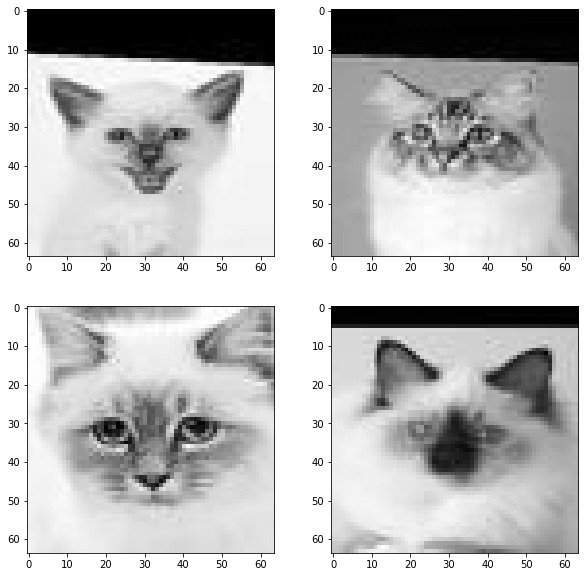

In [3]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10))
ax[0, 0].imshow(train_cat_np[0], cmap='gray')
ax[0, 1].imshow(train_cat_np[1], cmap='gray')
ax[1, 0].imshow(train_cat_np[2], cmap='gray')
ax[1, 1].imshow(train_cat_np[3], cmap='gray')

In [4]:
train_cat_np_matrix = train_cat_np.reshape(train_cat_np.shape[0], train_cat_np.shape[1]*train_cat_np.shape[2])
mean_train_cat = np.mean(train_cat_np_matrix, axis=0)
centered_train_cat = train_cat_np_matrix - mean_train_cat

In [5]:
U_CAT_TRAIN, S_CAT_TRAIN, V_CAT_TRAIN = np.linalg.svd(centered_train_cat, full_matrices=False)

In [6]:
n_comp = 4096
C_CAT_TRAIN = V_CAT_TRAIN[:n_comp]
eigen_cats_train = C_CAT_TRAIN.reshape((n_comp, 64, 64))

In [7]:
percent_eigenvalues = [eigenvalue/np.sum(S_CAT_TRAIN**2) for eigenvalue in S_CAT_TRAIN**2]
count = 0
total_var = 0
var_values = []
for eigenvalue in percent_eigenvalues:
    total_var += eigenvalue
    count += 1
    var_values.append(total_var)
    if total_var > 0.95:
        break

print("Count:", count, "\nTotal Variance:", total_var)

Count: 381 
Total Variance: 0.9500085306825041


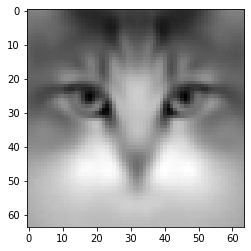

In [8]:
plt.figure()
plt.imshow(mean_train_cat.reshape(64, 64), cmap='gray')

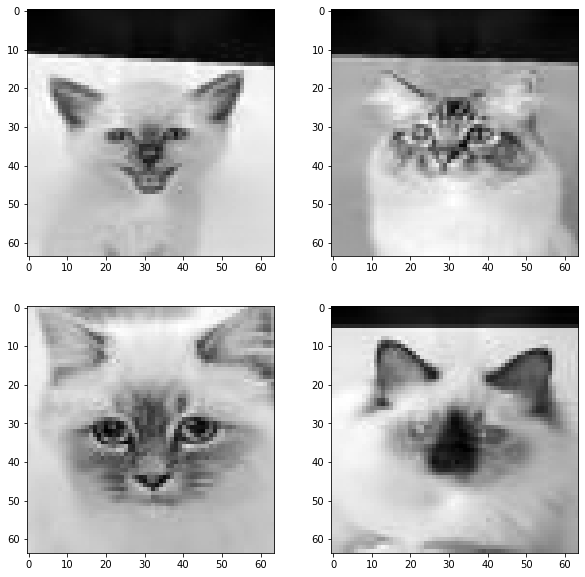

In [9]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10))
ax[0, 0].imshow(train_cat_np[0]-mean_train_cat.reshape(64,64), cmap='gray')
ax[0, 1].imshow(train_cat_np[1]-mean_train_cat.reshape(64,64), cmap='gray')
ax[1, 0].imshow(train_cat_np[2]-mean_train_cat.reshape(64,64), cmap='gray')
ax[1, 1].imshow(train_cat_np[3]-mean_train_cat.reshape(64,64), cmap='gray')

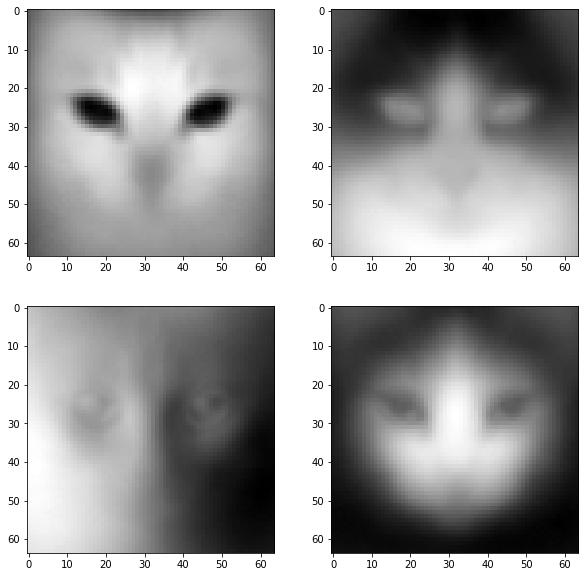

In [10]:
#Plot the images
fig, ax = plt.subplots(2, 2, figsize=(10, 10))
ax[0, 0].imshow(eigen_cats_train[0], cmap='gray')
ax[0, 1].imshow(eigen_cats_train[1], cmap='gray')
ax[1, 0].imshow(eigen_cats_train[2], cmap='gray')
ax[1, 1].imshow(eigen_cats_train[3], cmap='gray')

In [45]:
def is_a_cat(imagem, n_componentes):
    img3 = imagem.reshape((4096,))
    U_ = U_CAT_TRAIN[:n_componentes]
    p = np.dot(np.identity(n_componentes) - np.dot(U_,U_.T), img3 - mean_train_cat)
    d = np.linalg.norm(p)
    lim = 5000
    return d < lim, d, p

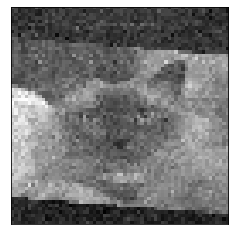

In [76]:
imagem = 'cat2dog/testA/176.jpg'
img = plt.imread(imagem)
img1 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img2 = cv2.resize(img1, dsize=(64,64), interpolation=cv2.INTER_CUBIC)
img3 = img2.reshape((4096,))
a = is_a_cat(img3, n_comp)
plt.imshow(plt.imread(imagem),cmap=plt.cm.gray) 
plt.xticks(())
plt.yticks(())
plt.imshow(d[2].reshape(64,64), cmap='gray') #Plot the projection

## EigenDogs

In [13]:
train_dog = "cat2dog_resized/train_dogs"
train_dog_list = []
for image in (os.listdir(train_dog)):
    path = os.path.join(train_dog, image)
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    train_dog_list.append(img)
train_dog_np = np.array(train_dog_list)

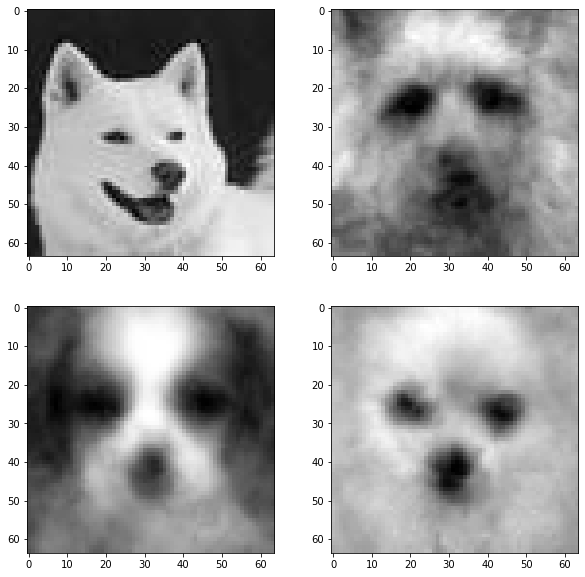

In [14]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10))
ax[0, 0].imshow(train_dog_np[0], cmap='gray')
ax[0, 1].imshow(train_dog_np[1], cmap='gray')
ax[1, 0].imshow(train_dog_np[201], cmap='gray')
ax[1, 1].imshow(train_dog_np[300], cmap='gray')

In [15]:
train_dog_np_matrix = train_dog_np.reshape(train_dog_np.shape[0], train_dog_np.shape[1]*train_dog_np.shape[2])
mean_train_dog = np.mean(train_dog_np_matrix, axis=0)
centered_train_dog = train_dog_np_matrix - mean_train_dog

In [16]:
U_DOG_TRAIN, S_DOG_TRAIN, V_DOG_TRAIN = np.linalg.svd(centered_train_dog, full_matrices=False)

In [17]:
n_comp = 4096
C_DOG_TRAIN = V_DOG_TRAIN[:n_comp]
eigen_dogs_train = C_DOG_TRAIN.reshape((n_comp, 64, 64))

In [18]:
percent_eigenvalues = [eigenvalue/np.sum(S_DOG_TRAIN**2) for eigenvalue in S_DOG_TRAIN**2]
count = 0
total_var = 0
var_values = []
for eigenvalue in percent_eigenvalues:
    total_var += eigenvalue
    count += 1
    var_values.append(total_var)
    if total_var > 0.95:
        break

print("Count:", count, "\nTotal Variance:", total_var)

Count: 48 
Total Variance: 0.9500780361908324


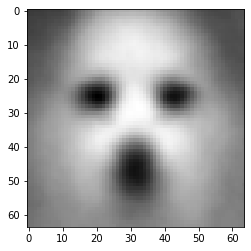

In [19]:
plt.figure()
plt.imshow(mean_train_dog.reshape(64, 64), cmap='gray')

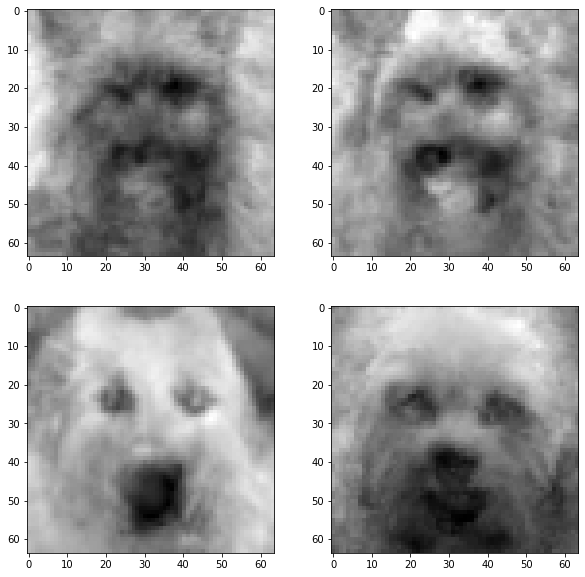

In [20]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10))
ax[0, 0].imshow(train_dog_np[1]-mean_train_dog.reshape(64,64), cmap='gray')
ax[0, 1].imshow(train_dog_np[10]-mean_train_dog.reshape(64,64), cmap='gray')
ax[1, 0].imshow(train_dog_np[255]-mean_train_dog.reshape(64,64), cmap='gray')
ax[1, 1].imshow(train_dog_np[988]-mean_train_dog.reshape(64,64), cmap='gray')

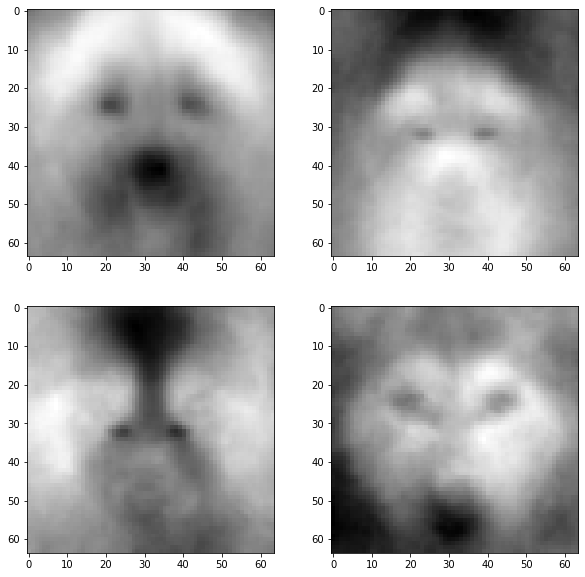

In [21]:
#Plot the images
fig, ax = plt.subplots(2, 2, figsize=(10, 10))
ax[0, 0].imshow(eigen_dogs_train[0], cmap='gray')
ax[0, 1].imshow(eigen_dogs_train[1], cmap='gray')
ax[1, 0].imshow(eigen_dogs_train[2], cmap='gray')
ax[1, 1].imshow(eigen_dogs_train[3], cmap='gray')

In [43]:
def is_a_dog(imagem, n_componentes):
    img3 = imagem.reshape((4096,))
    U_ = U_DOG_TRAIN[:n_componentes]
    p = np.dot(np.identity(n_componentes) - np.dot(U_,U_.T), img3 - mean_train_dog)
    d = np.linalg.norm(p)
    lim = 4500
    return d < lim, d, p

(True, 4288.209353233352, array([-19.5305393 , -74.9891627 , -35.61158146, ..., -84.29767265,
       -87.42638994, -66.57621831]))


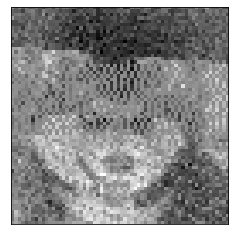

In [44]:
imagem = 'cat2dog/testB/14.jpg'
img = plt.imread(imagem)
img1 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img2 = cv2.resize(img1, dsize=(64,64), interpolation=cv2.INTER_CUBIC)
img3 = img2.reshape((4096,))
a = is_a_dog(img3, n_comp)
plt.imshow(plt.imread(imagem),cmap=plt.cm.gray) 
plt.xticks(())
plt.yticks(())
plt.imshow(a[2].reshape(64,64), cmap='gray') #Plot the projection
print(a)

## Finish and Tests

In [24]:
def cat_or_dog(image):
    is_dog = is_a_dog(image, n_comp)
    is_cat = is_a_cat(image, n_comp)
    if is_dog[1] < is_cat[1] and is_dog[0] == True:
        return "Dog", is_dog[1], is_cat[1]
    elif is_dog[1] > is_cat[1] and is_cat[0] == True:
        return "Cat", is_cat[1], is_dog[1]
    else:
        return "None", is_cat[1], is_dog[1]

('None', 6090.986519451908, 5309.028780832869)


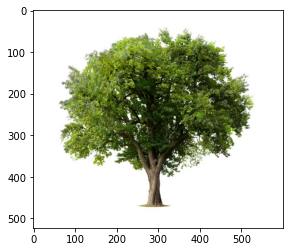

In [69]:
imagem = 'test/arvore.jpg'
img = plt.imread(imagem)
img1 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img2 = cv2.resize(img1, dsize=(64,64), interpolation=cv2.INTER_CUBIC)
img3 = img2.reshape((4096,))
print(cat_or_dog(img3))
plt.imshow(img,cmap=plt.cm.gray)

('Dog', 2476.56789359219, 2571.6375534504577)


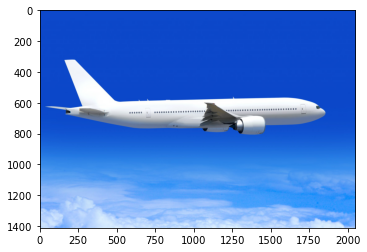

In [75]:
imagem = 'test/aviao.jpg'
img = plt.imread(imagem)
img1 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img2 = cv2.resize(img1, dsize=(64,64), interpolation=cv2.INTER_CUBIC)
img3 = img2.reshape((4096,))
print(cat_or_dog(img3))
plt.imshow(img,cmap=plt.cm.gray)

('Cat', 2882.999687815792, 3294.8711598084287)


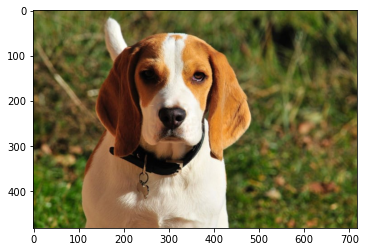

In [70]:
imagem = 'test/cao1.jpg'
img = plt.imread(imagem)
img1 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img2 = cv2.resize(img1, dsize=(64,64), interpolation=cv2.INTER_CUBIC)
img3 = img2.reshape((4096,))
print(cat_or_dog(img3))
plt.imshow(img,cmap=plt.cm.gray)

('Dog', 2532.7771956086717, 2885.928384630894)


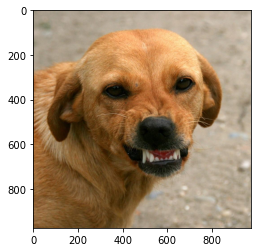

In [71]:
imagem = 'test/cao2.jpg'
img = plt.imread(imagem)
img1 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img2 = cv2.resize(img1, dsize=(64,64), interpolation=cv2.INTER_CUBIC)
img3 = img2.reshape((4096,))
print(cat_or_dog(img3))
plt.imshow(img,cmap=plt.cm.gray)

('None', 6028.29926602135, 5113.680288663168)


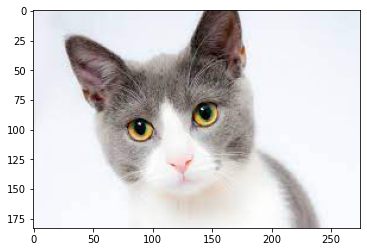

In [72]:
imagem = 'test/gato1.jpg'
img = plt.imread(imagem)
img1 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img2 = cv2.resize(img1, dsize=(64,64), interpolation=cv2.INTER_CUBIC)
img3 = img2.reshape((4096,))
print(cat_or_dog(img3))
plt.imshow(img,cmap=plt.cm.gray)

('Dog', 3760.2218909297976, 3812.073113311217)


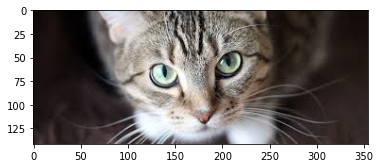

In [74]:
imagem = 'test/gato2.jpg'
img = plt.imread(imagem)
img1 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img2 = cv2.resize(img1, dsize=(64,64), interpolation=cv2.INTER_CUBIC)
img3 = img2.reshape((4096,))
print(cat_or_dog(img3))
plt.imshow(img,cmap=plt.cm.gray)

In [26]:
test_cat = "cat2dog/testA"
accuracy_test = []
for image in (os.listdir(test_cat)): 
    path = os.path.join(test_cat, image)
    img = plt.imread(path)
    img1 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img2 = cv2.resize(img1, dsize=(64,64), interpolation=cv2.INTER_CUBIC)
    img3 = img2.reshape((4096,))
    accuracy_test.append(cat_or_dog(img3)[0] == "Cat")

In [27]:
accuracy_test = np.array(accuracy_test)
print("Accuracy:", np.sum(accuracy_test)/len(accuracy_test))
print(accuracy_test)

Accuracy: 0.35
[ True False False False False False False  True False  True  True  True
 False False False False  True  True False False False False False False
 False False False False False False False  True  True False False False
 False  True False  True  True False False  True False False False  True
  True  True False False False False  True False  True False  True  True
  True False  True False False  True False False  True  True False False
 False  True False False False  True False  True  True False False False
 False False  True  True  True False False  True False False False False
  True  True False False]


In [28]:
test_dog = "cat2dog/testB"
accuracy_test_dog = []
for image in (os.listdir(test_dog)): 
    path = os.path.join(test_dog, image)
    img = plt.imread(path)
    img1 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img2 = cv2.resize(img1, dsize=(64,64), interpolation=cv2.INTER_CUBIC)
    img3 = img2.reshape((4096,))
    accuracy_test_dog.append(cat_or_dog(img3)[0] == "Dog")

In [29]:
accuracy_test_dog = np.array(accuracy_test_dog)
print("Accuracy:", np.sum(accuracy_test_dog)/len(accuracy_test_dog))
print(accuracy_test_dog)

Accuracy: 0.64
[ True  True  True False  True  True False  True  True  True False  True
  True  True  True  True  True  True  True False  True  True False  True
 False  True False  True  True False  True  True  True False  True  True
 False  True  True False  True  True  True  True False  True  True False
  True False False  True  True  True  True False False False  True  True
 False False False False  True False  True False  True False  True  True
  True False  True False False False  True  True  True  True  True False
  True False  True  True False  True  True  True  True  True False False
  True False  True False]
